In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score,classification_report, roc_auc_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

RANDOM_STATE = 55

In [185]:
df = pd.read_csv('C:\\Users\\KIIT\\Downloads\\diabetes.csv')
print(df.shape)
df.info()

(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


This is to perform statistical analysis

In [186]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Histograms

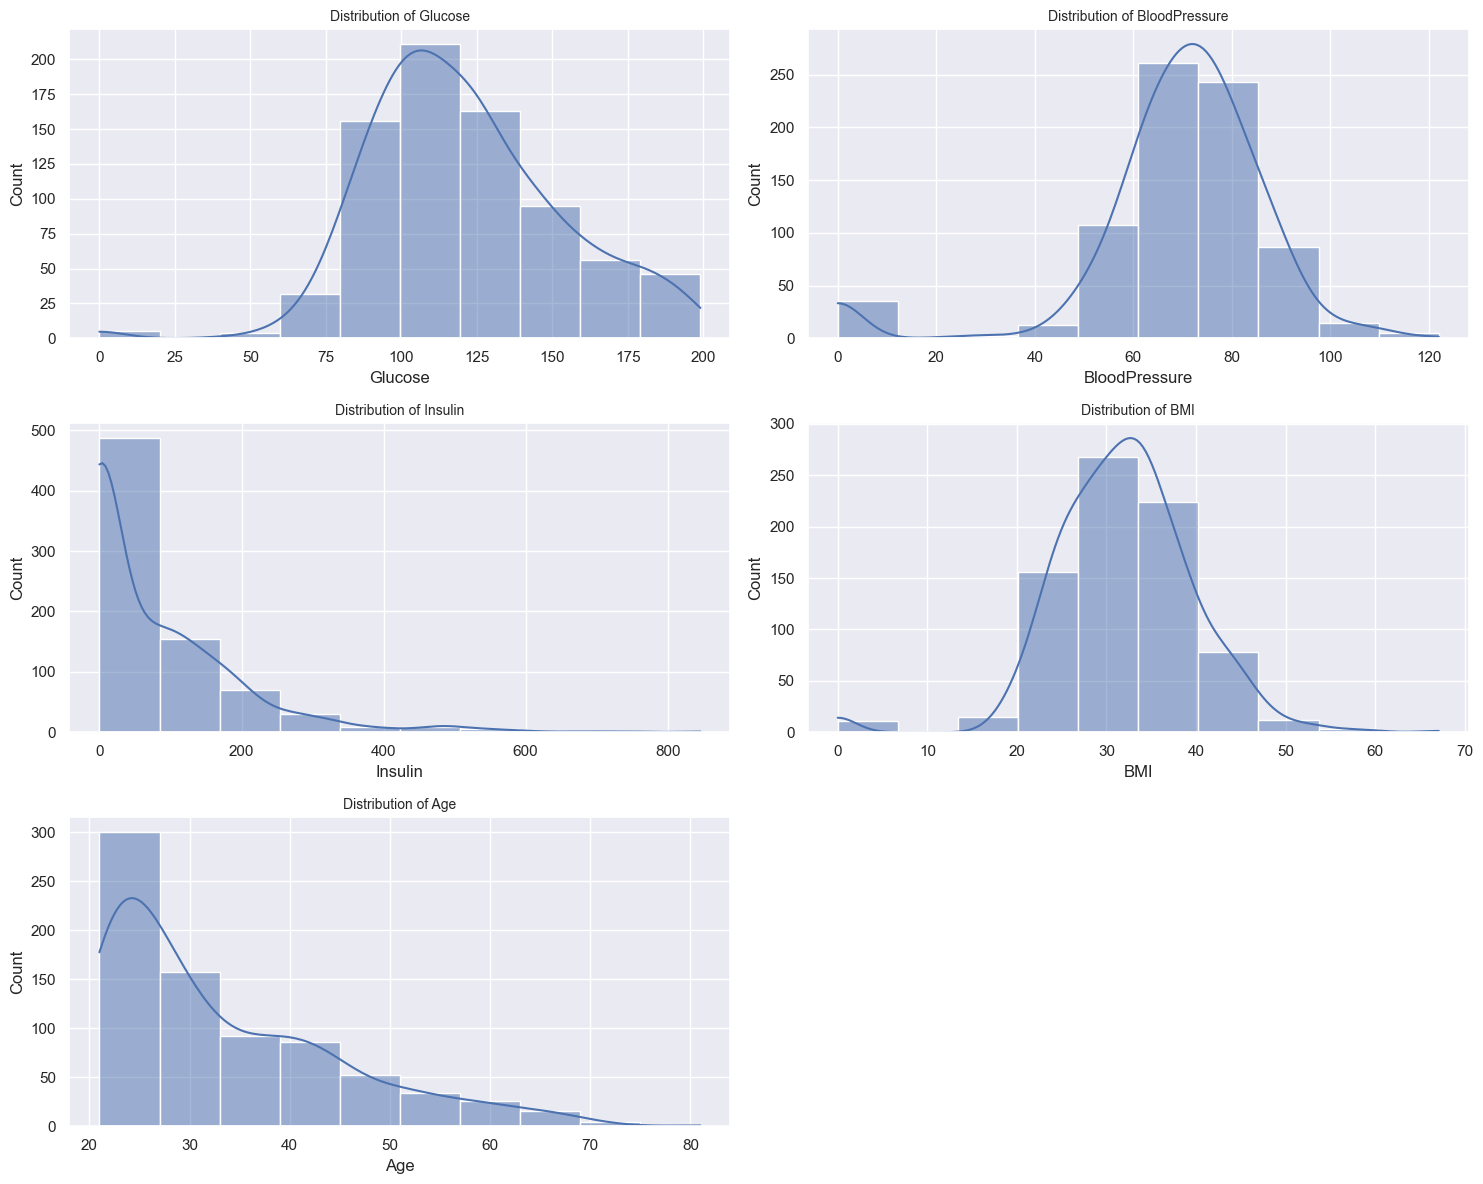

In [187]:
numerical_features = ['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'Age']
plt.figure(figsize=(15, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[feature], kde=True, bins=10)
    plt.title(f'Distribution of {feature}', fontsize=10)
plt.tight_layout()
plt.show()

Boxplots (Outlier Detection):

Outliers in Insulin (>400), BloodPressure (>100), and Glucose (>180) are evident. For example, BMI has outliers above 50 (extreme obesity).

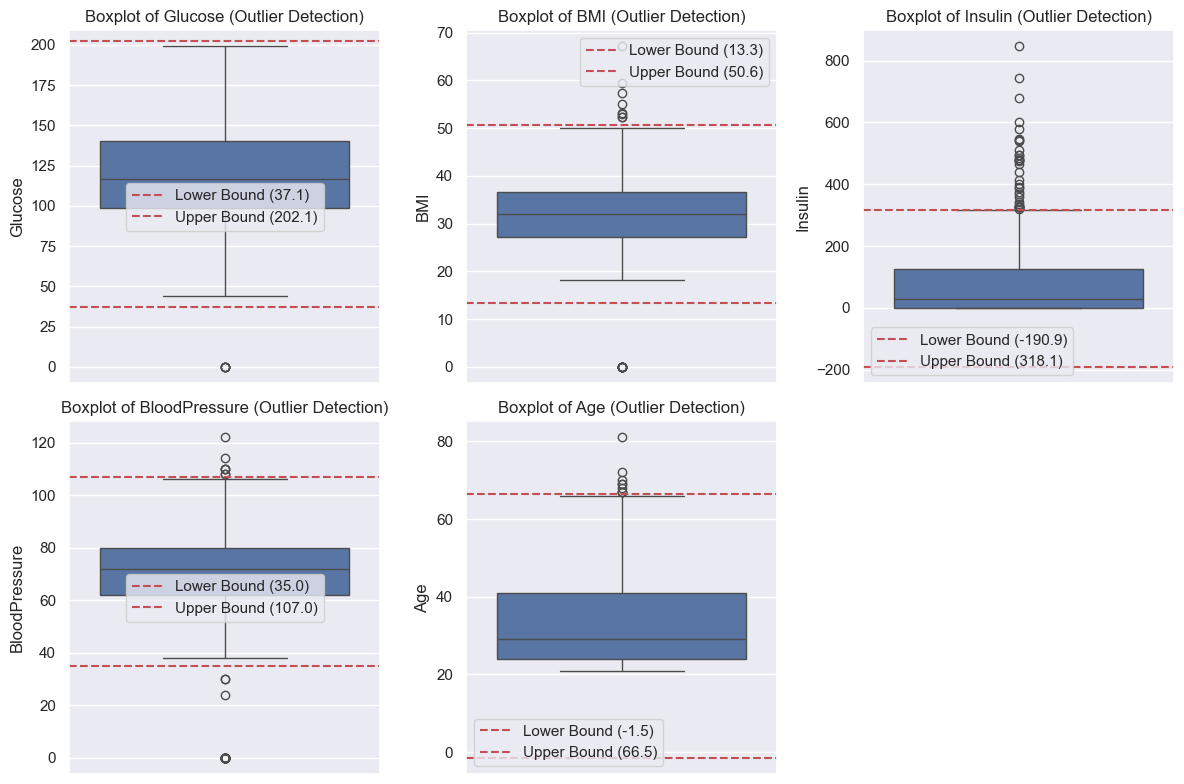

In [188]:
Fr = ['Glucose', 'BMI', 'Insulin', 'BloodPressure', 'Age'] 
plt.figure(figsize=(12, 8))
for i, fr in enumerate(Fr, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[fr])
    plt.title(f'Boxplot of {fr} (Outlier Detection)')
    q1 = df[fr].quantile(0.25)
    q3 = df[fr].quantile(0.75)
    IQR = q3 - q1
    lbound = q1 - 1.5 * IQR
    ubound = q3 + 1.5 * IQR
    plt.axhline(y=lbound, color='r', linestyle='--', label=f'Lower Bound ({lbound:.1f})')
    plt.axhline(y=ubound, color='r', linestyle='--', label=f'Upper Bound ({ubound:.1f})')
    plt.legend()
plt.tight_layout()
plt.show()


A table (from df.corr()) showing pairwise correlations for all variables.

In [189]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [190]:
Outcorr = df.corr()['Outcome'].sort_values(ascending=True)
print("\nTop Correlations with Outcome:")
print(Outcorr.round(2))


Top Correlations with Outcome:
BloodPressure               0.07
SkinThickness               0.07
Insulin                     0.13
DiabetesPedigreeFunction    0.17
Pregnancies                 0.22
Age                         0.24
BMI                         0.29
Glucose                     0.47
Outcome                     1.00
Name: Outcome, dtype: float64


In [191]:
outcomecount = df['Outcome'].value_counts()
outcomepercentage = df['Outcome'].value_counts(normalize=True) * 100#representation of percentage value

balance = pd.DataFrame({
    'Count': outcomecount,
    'Percentage': outcomepercentage.round(2)
}).sort_index()
print("Class Balance Summary:\n", balance)

# imbalance ratio (majority / minority)
imbalanceratio = outcomecount.max() / outcomecount.min()
print(f"\nImbalance Ratio (Majority/Minority): {imbalanceratio:.2f}")

Class Balance Summary:
          Count  Percentage
Outcome                   
0          500        65.1
1          268        34.9

Imbalance Ratio (Majority/Minority): 1.87


Moderate Imbalance

 A 1.87 ratio is noticeable and more challenging than mild cases (1.0-1.5), but far from extreme (e.g., credit card fraud at 500:1). The dataset is skewed toward healthy outcomes, which is realistic for screening scenarios but can bias models toward predicting "no diabetes" (easy 65% accuracy baseline)

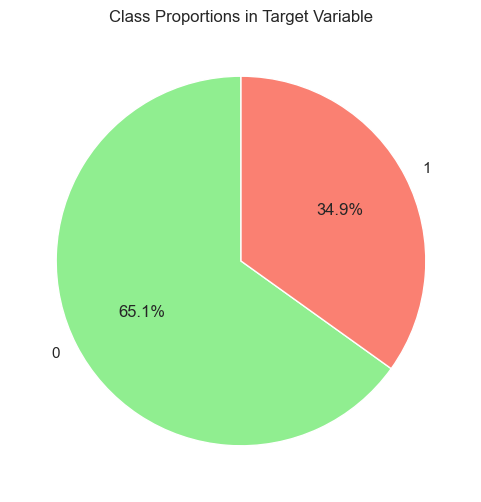

In [221]:
plt.figure(figsize=(6, 6))
plt.pie(outcomepercentage.values, labels=outcomepercentage.index, autopct='%1.1f%%', 
        colors=['lightgreen', 'salmon'], startangle=90)
plt.title('Class Proportions in Target Variable')
plt.show()

Percentage of patients without Diabetes: 65.1% (about 500 patients)

Percentage of patients with Diabetes: 34.9% (about 268 patients)

In [193]:
print("\n=== Original NaN Check (All 0) ===")
print("Missing values per column:\n", df.isnull().sum())  
print("\nTotal missing:", df.isnull().sum().sum())
print("\nMissing percentage:\n", (df.isnull().sum() / len(df)) * 100)


=== Original NaN Check (All 0) ===
Missing values per column:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Total missing: 0

Missing percentage:
 Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64


In [194]:
#detect zeros
print("\n=== Zero Counts (Likely Missings) ===")
zero_counts = (df == 0).sum()
print("Zeros per column:\n", zero_counts)
print("\nZero percentage:\n", (zero_counts / len(df)) * 100)


=== Zero Counts (Likely Missings) ===
Zeros per column:
 Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Zero percentage:
 Pregnancies                 14.453125
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                     65.104167
dtype: float64


We will now convert invalid zero values NaN

In [195]:
#many other values are missing such as pregnancies but 0 pregnancies is a valid input
zero2NaN = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [196]:
dfgap = df.copy()  # work on a copy not affecting original data
for col in zero2NaN:
    dfgap[col] = dfgap[col].replace(0, np.nan)


In [197]:

print("Missing values per column:\n", dfgap.isnull().sum())  # Counts NaN per column
print("\nTotal missing:", dfgap.isnull().sum().sum())
print("\nMissing percentage:\n", (dfgap.isnull().sum() / len(dfgap)) * 100)

Missing values per column:
 Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Total missing: 652

Missing percentage:
 Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64


In [198]:

imputer = SimpleImputer(strategy='median')
dfimputed = dfgap.copy()
dfimputed[zero2NaN] = imputer.fit_transform(dfgap[zero2NaN])
print("\n=== After Median Imputation ===")
print("Missing values per column (should be 0):\n", dfimputed.isnull().sum())
print("\nSample Before/After Imputation (First 5 rows, Insulin column):")
print("Before:\n", dfgap['Insulin'].head())
print("After:\n", dfimputed['Insulin'].head())
# save cleaned data
dfimputed.to_csv('diabetes_cleaned.csv', index=False)



=== After Median Imputation ===
Missing values per column (should be 0):
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Sample Before/After Imputation (First 5 rows, Insulin column):
Before:
 0      NaN
1      NaN
2      NaN
3     94.0
4    168.0
Name: Insulin, dtype: float64
After:
 0    125.0
1    125.0
2    125.0
3     94.0
4    168.0
Name: Insulin, dtype: float64


In [199]:
imputer = SimpleImputer(strategy='median')
dfimputed = dfgap.copy()
dfimputed[zero2NaN] = imputer.fit_transform(dfgap[zero2NaN])
print("\n=== After Median Imputation ===")
print("Missing values per column (should be 0):\n", dfimputed.isnull().sum())
print("\nSample Before/After Imputation (First 5 rows, BP column):")
print("Before:\n", dfgap['BloodPressure'].head())
print("After:\n", dfimputed['BloodPressure'].head())
# save cleaned data
dfimputed.to_csv('diabetes_cleaned.csv', index=False)



=== After Median Imputation ===
Missing values per column (should be 0):
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Sample Before/After Imputation (First 5 rows, BP column):
Before:
 0    72.0
1    66.0
2    64.0
3    66.0
4    40.0
Name: BloodPressure, dtype: float64
After:
 0    72.0
1    66.0
2    64.0
3    66.0
4    40.0
Name: BloodPressure, dtype: float64


In [200]:
imputer = SimpleImputer(strategy='median')
dfimputed = dfgap.copy()
dfimputed[zero2NaN] = imputer.fit_transform(dfgap[zero2NaN])
print("\n=== After Median Imputation ===")
print("Missing values per column (should be 0):\n", dfimputed.isnull().sum())
print("\nSample Before/After Imputation (First 5 rows, SkinThickness column):")
print("Before:\n", dfgap['SkinThickness'].head())
print("After:\n", dfimputed['SkinThickness'].head())
# save cleaned data
dfimputed.to_csv('diabetes_cleaned.csv', index=False)



=== After Median Imputation ===
Missing values per column (should be 0):
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Sample Before/After Imputation (First 5 rows, SkinThickness column):
Before:
 0    35.0
1    29.0
2     NaN
3    23.0
4    35.0
Name: SkinThickness, dtype: float64
After:
 0    35.0
1    29.0
2    29.0
3    23.0
4    35.0
Name: SkinThickness, dtype: float64


Feature Engineering to create new features

In [201]:
bins=[70,110,140,200,np.inf]
labels = ["Low","Normal","Borderline","High"]
dfimputed["NewGlucose"]=pd.cut(dfimputed["Glucose"],bins=bins,labels=labels,right=False,ordered=True)
#memory efficiency
dfimputed["NewGlucose"] = dfimputed["NewGlucose"].astype("category")

In [202]:
print("Glucose Categories Created Successfully!")
print("Shape:", dfimputed.shape)
print("\nNewBMI Distribution:\n", dfimputed["NewGlucose"].value_counts(sort=False))  # false to match bin order
print("\nSample Data (Glucose and NewGlucose):\n", dfimputed[["Glucose", "NewGlucose"]].head(5))

Glucose Categories Created Successfully!
Shape: (768, 10)

NewBMI Distribution:
 NewGlucose
Low           298
Normal        262
Borderline    197
High            0
Name: count, dtype: int64

Sample Data (Glucose and NewGlucose):
    Glucose  NewGlucose
0    148.0  Borderline
1     85.0         Low
2    183.0  Borderline
3     89.0         Low
4    137.0      Normal


In [203]:
bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, np.inf]
labels = ["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"]
dfimputed["NewBMI"] = pd.cut(dfimputed["BMI"], bins=bins, labels=labels, right=False, ordered=True)
# memory efficiency
dfimputed["NewBMI"] = dfimputed["NewBMI"].astype("category")

In [204]:
print("BMI Categories Created Successfully!")
print("Shape:", dfimputed.shape)
print("\nNewBMI Distribution:\n", dfimputed["NewBMI"].value_counts(sort=False))  # false to match bin order
print("\nSample Data (BMI and NewBMI):\n", dfimputed[["BMI", "NewBMI"]].head(5))

BMI Categories Created Successfully!
Shape: (768, 11)

NewBMI Distribution:
 NewBMI
Underweight      4
Normal         101
Overweight     175
Obesity 1      234
Obesity 2      153
Obesity 3      101
Name: count, dtype: int64

Sample Data (BMI and NewBMI):
     BMI      NewBMI
0  33.6   Obesity 1
1  26.6  Overweight
2  23.3      Normal
3  28.1  Overweight
4  43.1   Obesity 3


In [205]:
#one hot encoding

#create categorical columns
dfimputed['New_BMI'] = pd.cut(dfimputed['BMI'], bins=[18, 24, 28, np.inf], 
                         labels=['Underweight', 'Overweight', 'Obese'], right=False)
dfimputed['New_Glucose'] = pd.cut(dfimputed['Glucose'], bins=[70, 145,np.inf], 
                         labels=['Normal','Abnormal'], right=False)
dfimputed['Age_Group'] = pd.cut(dfimputed['Age'], bins=[0, 30, 50, 100], 
                         labels=['Young', 'Middle', 'Senior'], right=False)
dfimputed['Glucose_Level'] = pd.cut(dfimputed['Glucose'], bins=[0, 70, 140, np.inf], 
                             labels=['Low', 'Normal', 'High'], right=False)

C = ['New_BMI','Age_Group','Glucose_Level']
variables=['BMI','Age','Glucose']

dfohen = pd.get_dummies(data = dfimputed,
                         prefix = variables,
                         columns =C,
                         drop_first=True,
                         dtype=int)

#removing the repeating columns
onehot_cols = dfohen.filter(regex='^(Age_|Glucose_|BMI_|New)').columns.tolist()
print(f"\nNew One-Hot Columns Created: {onehot_cols}")

dfohen.head()



New One-Hot Columns Created: ['NewGlucose', 'NewBMI', 'New_Glucose', 'BMI_Overweight', 'BMI_Obese', 'Age_Middle', 'Age_Senior', 'Glucose_Normal', 'Glucose_High']


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewGlucose,NewBMI,New_Glucose,BMI_Overweight,BMI_Obese,Age_Middle,Age_Senior,Glucose_Normal,Glucose_High
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,Borderline,Obesity 1,Abnormal,0,1,0,1,0,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,Low,Overweight,Normal,1,0,1,0,1,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,Borderline,Normal,Abnormal,0,0,1,0,0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Low,Overweight,Normal,0,1,0,0,1,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Normal,Obesity 3,Normal,0,1,1,0,1,0


In [206]:
features = [x for x in dfohen.columns if x not in 'Outcome'] #removing the target variable
print(len(features))

17


In [207]:
#Save the final encoded dataset
dfohen.to_csv('diabetes_imputed_onehot.csv', index=False)

Splitting Data-Set

In [208]:
#Splitting the data-set
X = dfohen[numerical_features]  # Only numerical
y = dfohen['Outcome'].astype(int)  # Ensure 0/1
x_train, x_val, y_train, y_val = train_test_split(X,y, train_size = 0.8, random_state = RANDOM_STATE)

print(f'train samples: {len(x_train)}')
print(f'validation samples: {len(x_val)}')
print(f'target proportion: {sum(y_train)/len(y_train):.4f}')

train samples: 614
validation samples: 154
target proportion: 0.3371


In [209]:
print(f"\nTrain shape: {x_train.shape},Val shape: {x_val.shape}")


Train shape: (614, 5),Val shape: (154, 5)


Logistic Regression ( Baseline model)

In [210]:
model = LogisticRegression(random_state=RANDOM_STATE, max_iter=1000)
model.fit(x_train, y_train) 
y_pred = model.predict(x_val)  
#accuracy
accuracy_lr = accuracy_score(y_val, y_pred)

print(f"Accuracy (0-1 range): {accuracy_lr:.3f}")
print(f"Accuracy (percentage): {accuracy_lr * 100:.3f}%")  #percentage representation


Accuracy (0-1 range): 0.766
Accuracy (percentage): 76.623%


1.Random Forest

In [211]:
#train the model 
rf_model = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)
rf_model.fit(x_train, y_train)

print("Model trained !")

Model trained !


In [212]:
#evaluate
#prediction & probabilities
y_pred1= rf_model.predict(x_val)
y_pred_proba = rf_model.predict_proba(x_val)[:, 1]
#accuracy
accuracy_rf = accuracy_score(y_val, y_pred1)
print(f"1.Accuracy: {accuracy_lr:.3f}")
#precision,recall,f1-score
print("\n2.Classification Report:")
print(classification_report(y_val, y_pred1))
#auc-roc
auc = roc_auc_score(y_val, y_pred_proba)
print(f"3.AUC-ROC: {auc:.3f}")

1.Accuracy: 0.766

2.Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83        93
           1       0.74      0.70      0.72        61

    accuracy                           0.79       154
   macro avg       0.78      0.77      0.77       154
weighted avg       0.78      0.79      0.78       154

3.AUC-ROC: 0.816


2.XGBOOST

In [213]:
#train the model
xgb_model = XGBClassifier(
    n_estimators=100,
    random_state=RANDOM_STATE,
    eval_metric='logloss'  # For binary classification
)
xgb_model.fit(x_train, y_train)

print("Model trained !")


Model trained !


In [214]:
#evaluate
#prediction & probabilities
y_pred2 = xgb_model.predict(x_val)
y_pred_proba = xgb_model.predict_proba(x_val)[:, 1]
# accuracy
accuracy_xgb = accuracy_score(y_val, y_pred2)
print(f"1.Accuracy: {accuracy_xgb:.3f}")
# precision ,recall ,f1-score
print("\n2.Classification Report:")
print(classification_report(y_val, y_pred2))
#auc-roc
auc = roc_auc_score(y_val, y_pred_proba)
print(f"3.AUC-ROC: {auc:.3f}")

1.Accuracy: 0.747

2.Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        93
           1       0.70      0.64      0.67        61

    accuracy                           0.75       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.74      0.75      0.74       154

3.AUC-ROC: 0.805


Hyperparameters Tuning

As it concluded that accuracy is higher in Random Forest algorithm
Accuracy(random forest = .786)
Accuracy(XGBOOST = .747)

In [215]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Trees
    'max_depth': [10, 15, None],  # D
'min_samples_split': [2, 5, 10],  # Split threshold
'min_samples_leaf': [1, 2, 4],  # Leaf threshold
'max_features': ['sqrt', 'log2']  # Features per split
}
# GridSearchCV: 3x3x3x3x2 = 162 combinations, CV=5 → ~810 fits (runs in ~1-2 min on CPU)
rf_grid = RandomForestClassifier(random_state=RANDOM_STATE, class_weight='balanced')
grid_search = GridSearchCV(rf_grid, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)
# Best Model
best_rf = grid_search.best_estimator_
print(f"\nBest Parameters (GridSearch): {grid_search.best_params_}")
print(f"Best CV ROC-AUC: {grid_search.best_score_:.3f}")
# Evaluate on Val Set
y_pred_tuned = best_rf.predict(x_val)
y_proba_tuned = best_rf.predict_proba(x_val)[:, 1]
acc_tuned = accuracy_score(y_val, y_pred_tuned)
auc_tuned = roc_auc_score(y_val, y_proba_tuned)
print(f"Tuned Random Forest:")
print(f"Accuracy: {acc_tuned:.3f} ({acc_tuned * 100:.1f}%)")
print(f"ROC-AUC: {auc_tuned:.3f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred_tuned, target_names=['Non-Diabetic (0)', 'Diabetic (1)']))

Fitting 5 folds for each of 162 candidates, totalling 810 fits

Best Parameters (GridSearch): {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best CV ROC-AUC: 0.843
Tuned Random Forest:
Accuracy: 0.766 (76.6%)
ROC-AUC: 0.834

Classification Report:
                  precision    recall  f1-score   support

Non-Diabetic (0)       0.82      0.78      0.80        93
    Diabetic (1)       0.69      0.74      0.71        61

        accuracy                           0.77       154
       macro avg       0.76      0.76      0.76       154
    weighted avg       0.77      0.77      0.77       154



Already better than Logistic Regression (~77%).

Neural Network Implementation

In [216]:
import tensorflow as tf # type: ignore
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense, Dropout # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore
import warnings
warnings.filterwarnings('ignore')


In [217]:
NNmodel = Sequential()
NNmodel.add(Dense(16,activation='relu',input_shape=(x_train.shape[1],)))
NNmodel.add(Dense(8,activation='relu'))
NNmodel.add(Dense(1,activation='sigmoid'))

NNmodel.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
NNmodel.fit(x_train, y_train, epochs=50, batch_size=32, verbose=0, validation_split=0.2)

#predict with Neural Network
y_pred_nn = model.predict(x_val)
y_pred_nn.shape


(154,)

In [218]:
accuracy_nn = accuracy_score(y_val, y_pred_nn)
print(f"1.Accuracy: {accuracy_nn:.3f}")
print("\n2.Classification Report:\n", classification_report(y_val, y_pred_nn))


1.Accuracy: 0.766

2.Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.87      0.82        93
           1       0.76      0.61      0.67        61

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.76      0.77      0.76       154



In [219]:
acc = [accuracy_lr,accuracy_rf,accuracy_xgb,accuracy_nn]
algorithms = ["Logistic Regression","Random Forest","XGBoost","Neural Network"]    

for i in range(len(algorithms)):
      print(f"The accuracy score achieved using {algorithms[i]} is: {acc[i] * 100:.2f}%")


The accuracy score achieved using Logistic Regression is: 76.62%
The accuracy score achieved using Random Forest is: 78.57%
The accuracy score achieved using XGBoost is: 74.68%
The accuracy score achieved using Neural Network is: 76.62%


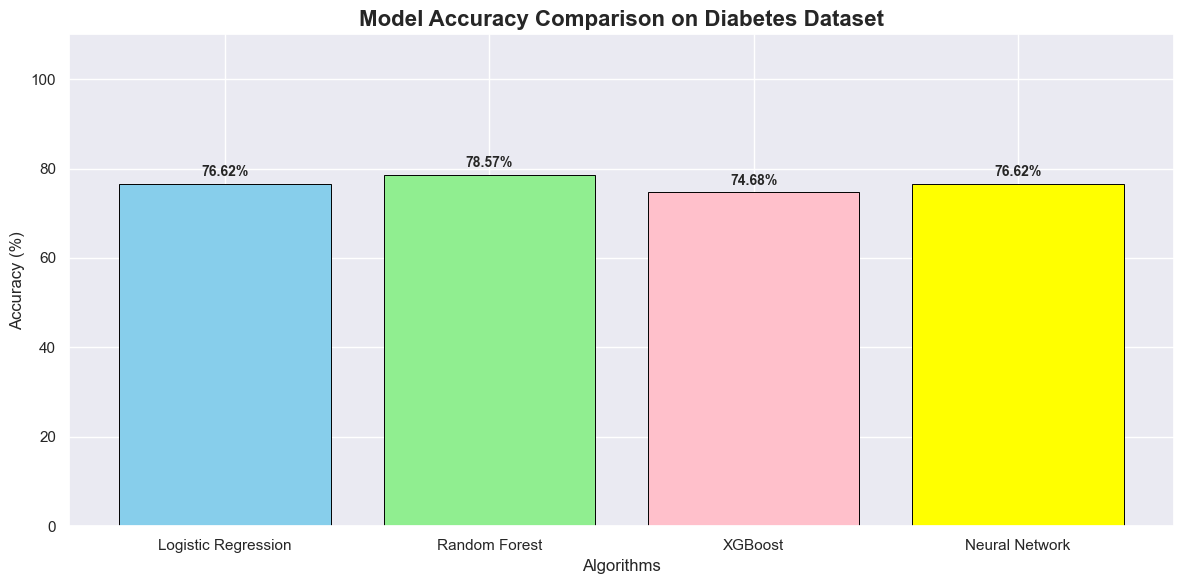

In [220]:
plt.figure(figsize=(12, 6))  #figure-size in inches
# bar-plot: x=algorithms, y=accuracies * 100 
bars = plt.bar(algorithms, [a * 100 for a in acc], 
               color=['skyblue', 'lightgreen', 'pink', 'yellow'],  # Custom colors for each bar
               edgecolor='black', linewidth=0.7)  #borders for clarity

plt.title('Model Accuracy Comparison on Diabetes Dataset', fontsize=16, fontweight='bold')
plt.ylabel('Accuracy (%)', fontsize=12)
plt.xlabel('Algorithms', fontsize=12)
plt.ylim(0, 110)  # Set y-limit from 0 to 115% for headroom visibility

plt.xticks(rotation=0, ha='center')

for bar, acc_val in zip(bars, acc):
    height = acc_val * 100
    plt.text(bar.get_x() + bar.get_width() / 2., height + 1,  # above the bar position
             f'{height:.2f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()
